In [35]:
import time
import random
import warnings
warnings.filterwarnings("ignore")
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
from pprint import pprint

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import graphviz
from IPython.display import display


# pre-processing
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


# import libraries for model validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
import statistics

In [36]:
HD=pd.read_csv("diabetes.csv")
print(HD.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [4]:
HD.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
HD.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df_HD=HD.rename({'Pregnancies':'Preg', 'BloodPressure':'BP', 'SkinThickness':'Skin_Thick','DiabetesPedigreeFunction':'DPF'},axis=1)

In [7]:
df_HD.dtypes

Preg            int64
Glucose         int64
BP              int64
Skin_Thick      int64
Insulin         int64
BMI           float64
DPF           float64
Age             int64
Outcome         int64
dtype: object

In [8]:
df_HD.head()

,Preg,Glucose,BP,Skin_Thick,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df_HD.describe

<bound method NDFrame.describe of      Preg  Glucose  BP  Skin_Thick  Insulin   BMI    DPF  Age  Outcome
0       6      148  72          35        0  33.6  0.627   50        1
1       1       85  66          29        0  26.6  0.351   31        0
2       8      183  64           0        0  23.3  0.672   32        1
3       1       89  66          23       94  28.1  0.167   21        0
4       0      137  40          35      168  43.1  2.288   33        1
..    ...      ...  ..         ...      ...   ...    ...  ...      ...
763    10      101  76          48      180  32.9  0.171   63        0
764     2      122  70          27        0  36.8  0.340   27        0
765     5      121  72          23      112  26.2  0.245   30        0
766     1      126  60           0        0  30.1  0.349   47        1
767     1       93  70          31        0  30.4  0.315   23        0

[768 rows x 9 columns]>

In [10]:
df_HD.isnull().sum()

Preg          0
Glucose       0
BP            0
Skin_Thick    0
Insulin       0
BMI           0
DPF           0
Age           0
Outcome       0
dtype: int64

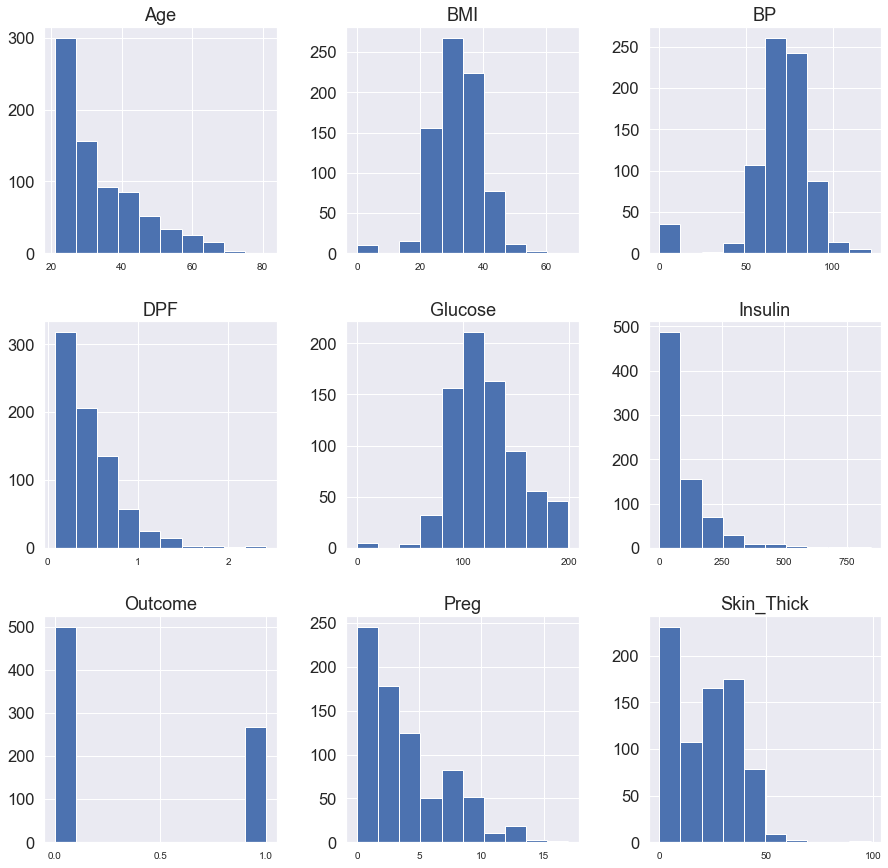

In [11]:
# Histograms:
df_HD.hist(figsize=(15,15), xlabelsize = 10);

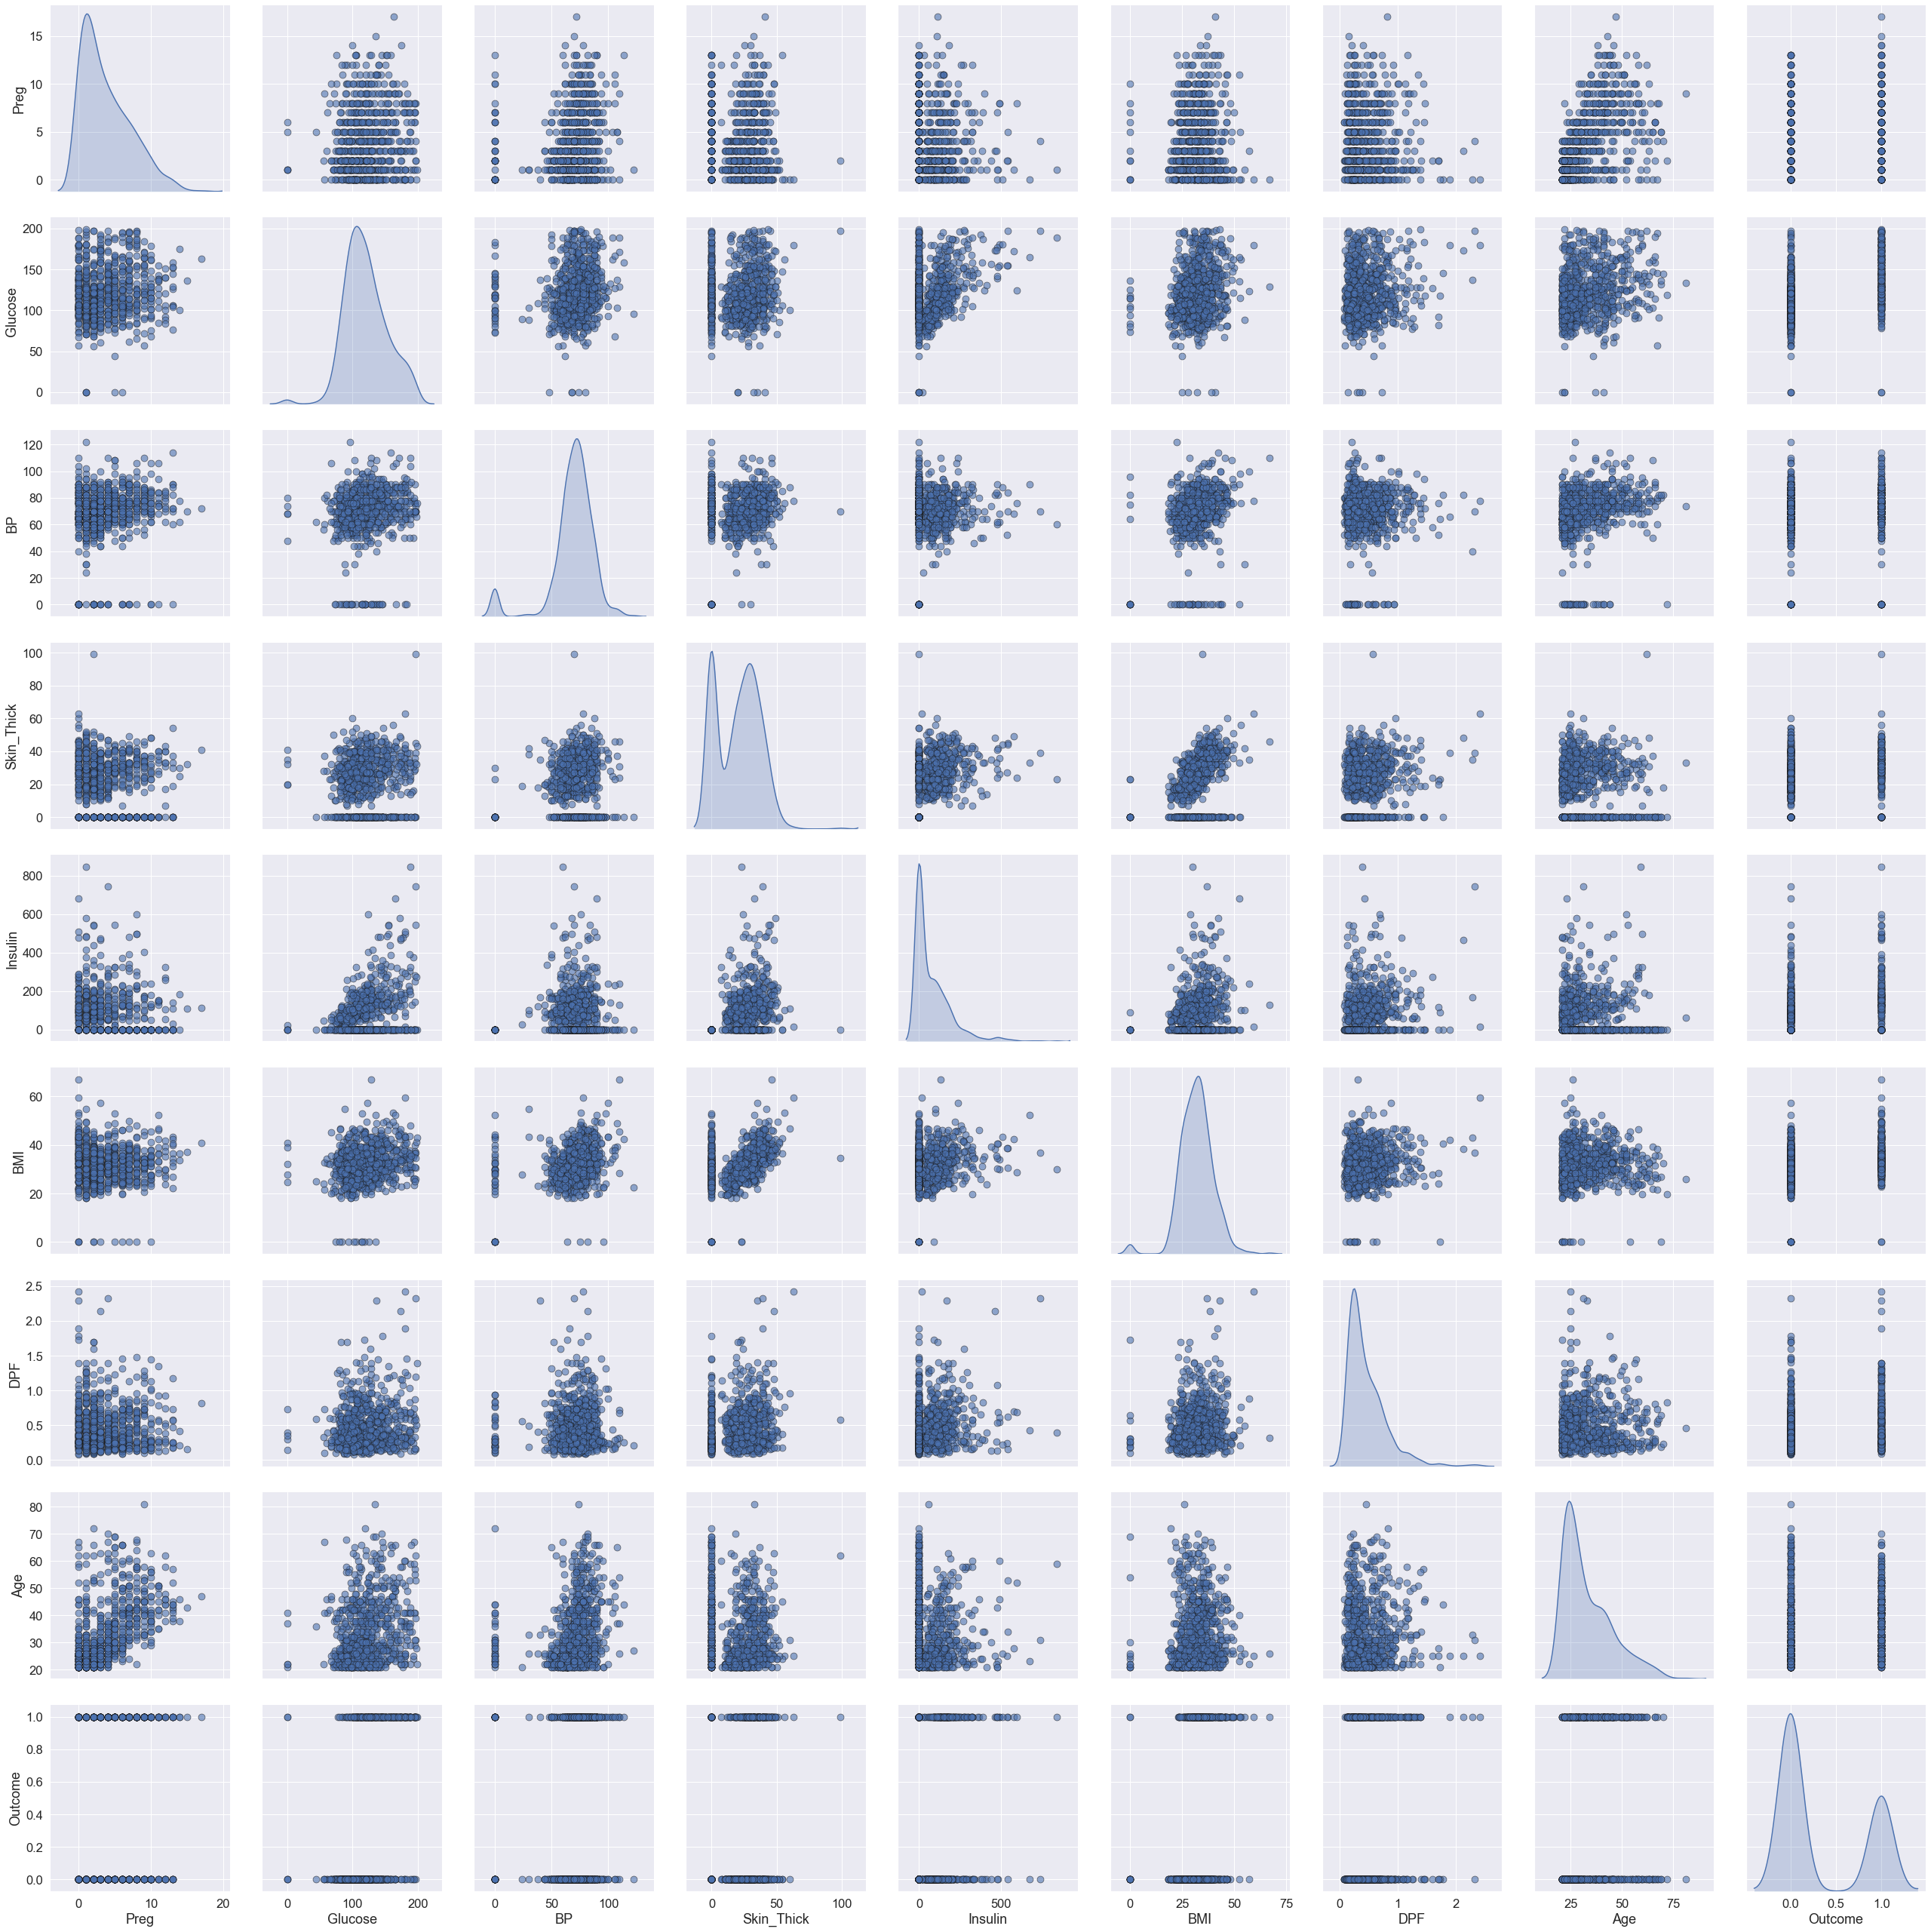

In [12]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(df_HD, diag_kind='kde',plot_kws={'alpha':0.6,'s':80,'edgecolor':'k'},size=4)

### Outliers:

In [13]:
# 1. Blood Pressure: Blood Pressure of a living Person cannot have diastolic blood pressure of zero.
# Lets see the counts of 0 values of Blood Pressure in a given dataset.
print("Total : ",df_HD[df_HD.BP ==0].shape[0])
print(df_HD[df_HD.BP ==0].groupby('Outcome')
      ['Age'].count())


Total :  35
Outcome
0    19
1    16
Name: Age, dtype: int64


In [14]:
# 2. Glucose Levels: zero level of Glucose is not valid reading in a gien dataset.
# Count of 0 values of Glucose Levelin a given dataset.
print("Total : ",df_HD[df_HD.Glucose ==0].shape[0])
print(df_HD[df_HD.Glucose ==0].groupby('Outcome')
      ['Age'].count())

Total :  5
Outcome
0    3
1    2
Name: Age, dtype: int64


In [15]:
# 3. Skin Thickness: Skin Thickness for a normal people can't be 0, which is invalid in a given dataset.
# Count of 0 values of Skin Thickness in a given dataset.
print("Total : ",df_HD[df_HD.Skin_Thick ==0].shape[0])
print(df_HD[df_HD.Skin_Thick ==0].groupby('Outcome')
      ['Age'].count())

Total :  227
Outcome
0    139
1     88
Name: Age, dtype: int64


In [16]:
# 4. BMI(Body Mass Index): Body Mass Index of a normal people can't be 0 (even for a underweight people).
# Count of 0 values of BMI in a given dataset.
print("Total : ",df_HD[df_HD.BMI ==0].shape[0])
print(df_HD[df_HD.BMI ==0].groupby('Outcome')
      ['Age'].count())

Total :  11
Outcome
0    9
1    2
Name: Age, dtype: int64


In [17]:
# 5. Insulin: zero level of Insulin is a rear case in a person.
# Count of 0 values in a given dataset.
print("Total : ",df_HD[df_HD.Insulin ==0].shape[0])
print(df_HD[df_HD.Insulin ==0].groupby('Outcome')
      ['Age'].count())

Total :  374
Outcome
0    236
1    138
Name: Age, dtype: int64


In [18]:
# Removing the rows with 0 values of "BP","BMI" and "Glucose" :
df_HDR=df_HD[(df_HD.BP!=0) & (df_HD.BMI!=0) & (df_HD.Glucose!=0)]
print(df_HD.shape)

(768, 9)


In [19]:
df_HDR.head()

,Preg,Glucose,BP,Skin_Thick,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
print(df_HDR.groupby('Outcome').size())

Outcome
0    475
1    249
dtype: int64


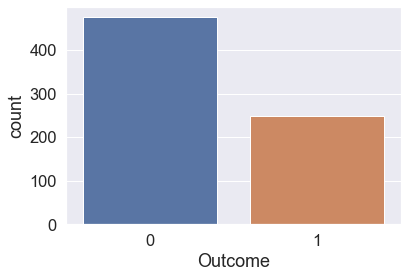

In [21]:
import seaborn as sns
sns.countplot(df_HDR['Outcome'],label="Count")

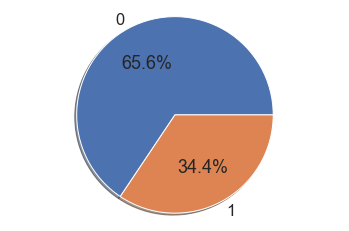

In [22]:
labels = df_HDR['Outcome'].astype('category').cat.categories.tolist()
counts = df_HDR['Outcome'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
explode = (0.1, 0 )
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [23]:
df_HDR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
Preg          724 non-null int64
Glucose       724 non-null int64
BP            724 non-null int64
Skin_Thick    724 non-null int64
Insulin       724 non-null int64
BMI           724 non-null float64
DPF           724 non-null float64
Age           724 non-null int64
Outcome       724 non-null int64
dtypes: float64(2), int64(7)
memory usage: 76.6 KB


                Preg   Glucose        BP  Skin_Thick   Insulin       BMI  \
Preg        1.000000  0.134915  0.209668   -0.095683 -0.080059  0.012342   
Glucose     0.134915  1.000000  0.223331    0.074381  0.337896  0.223276   
BP          0.209668  0.223331  1.000000    0.011777 -0.046856  0.287403   
Skin_Thick -0.095683  0.074381  0.011777    1.000000  0.420874  0.401528   
Insulin    -0.080059  0.337896 -0.046856    0.420874  1.000000  0.191831   
BMI         0.012342  0.223276  0.287403    0.401528  0.191831  1.000000   
DPF        -0.025996  0.136630 -0.000075    0.176253  0.182656  0.154858   
Age         0.557066  0.263560  0.324897   -0.128908 -0.049412  0.020835   
Outcome     0.224417  0.488384  0.166703    0.092030  0.145488  0.299375   

                 DPF       Age   Outcome  
Preg       -0.025996  0.557066  0.224417  
Glucose     0.136630  0.263560  0.488384  
BP         -0.000075  0.324897  0.166703  
Skin_Thick  0.176253 -0.128908  0.092030  
Insulin     0.182656 -0.

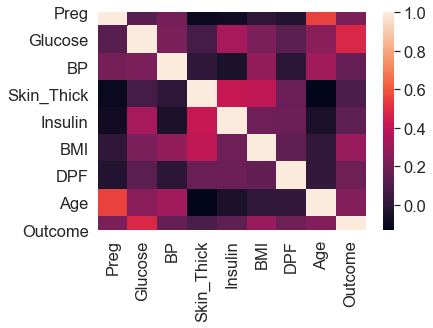

In [24]:
# Correlation of heat map:
corr = df_HDR.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

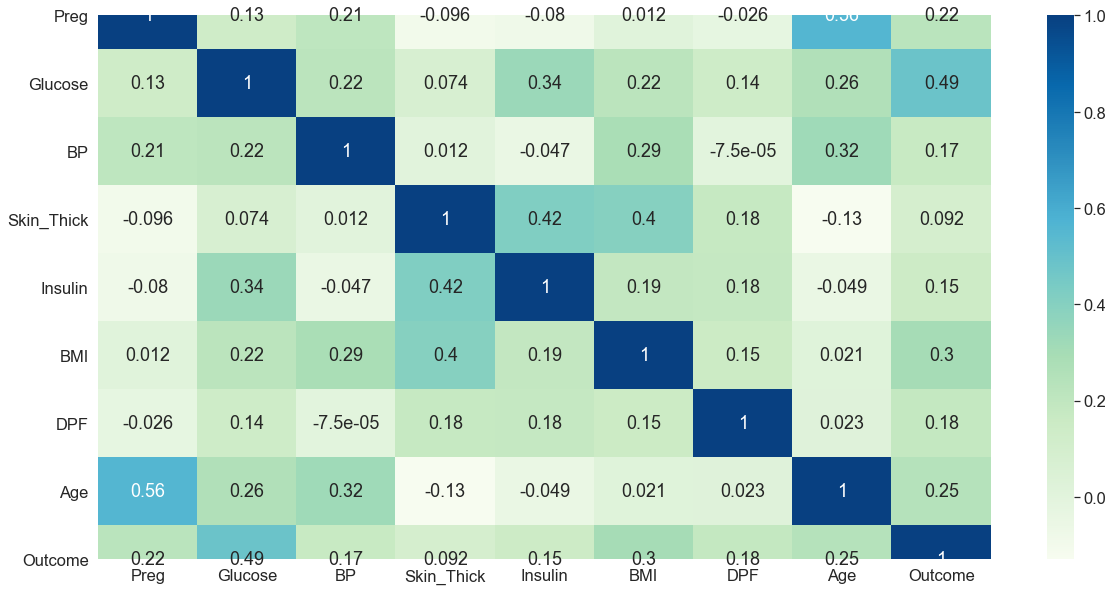

In [25]:
#OR:
# Generating the correlation heat-map
corrmat=df_HDR.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,10))
sns.heatmap( df_HDR[top_corr_features].corr(),annot=True,cmap="GnBu");

In [26]:
#Feature Engineering: to improve the performance and accuracy of the model.
#Lets assign the features to the X variable and the response to the y variable 
feature_names = ['Preg', 'Glucose', 'BP', 'Skin_Thick', 'Insulin', 'BMI', 'DPF', 'Age']
X = df_HDR[feature_names]
y = df_HDR.Outcome

In [30]:
# Model Selection:
# Lets initialize the seven different classifier models with their default parameters and add them to a model 
#list as:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))

In [31]:
# Evaluation Methods:
# I don't want training and testing on the same data.The goal of this model is to predict the out-of-sample data. 
# This could lead the overfiting. To avoid such problems, there are two precautions:
# (i) Train/Test Split
# (ii) K-Fold Cross Validation
# We have already import "train_test_split" and "cross_val_score" for k-fold cross validation.
# "accuracy_score" is to evaluate the accuracy of the model in the train/test split method.
## Train/Test Split splits the data set into two portions: a training set and a testing set.The training set is 
#  used to train the model and the testing set is used to test the model, and evaluate the accuracy.  

In [32]:
# Train/Test Split with Scikit Learn:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df_HDR.Outcome, random_state=0)

In [33]:
# Fitting of each model and calculation the accuracy of the respective model using the "accuracy_Score". 
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.729282
1  SVC  0.657459
2   LR  0.767956
3   DT  0.740331
4  GNB  0.734807
5   RF  0.790055
6   GB  0.773481
7  XGB  0.779006


In [37]:
# K-Fold Cross Validation
# This method splits the data set into K equal partitions ("folds"), then 1 fold as the testing set and the union 
# of the other folds as the training set. Then the model is tested for accuracy. The process will follow the above steps
# K times, using different fold as the testing set each time. The average testing accuracyof the process is the testing 
# accuracy. 
# This method is more accurate estimate of out-of-sample accuracy. More "efficient" use of data (every observation 
# is used for both training and testing). The downside of this method is much slower than Train/Test split.We need more 
# computation capability for this method.

names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.719787
1  SVC  0.656279
2   LR  0.766781
3   DT  0.696214
4  GNB  0.757021
5   RF  0.745967
6   GB  0.772298
7  XGB  0.765411


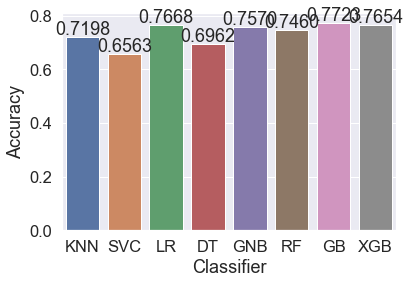

In [38]:
# Plotting the accuracy scores using Seaborn:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.009, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [39]:
# At the base line Logistic Regression can be selected to achieve a classification accuracy of76.67%. 
# However, Gradient Boosting classifier is managed to achieve a classification accuracy of 77.36%, which is greater than 
# the accuracy of the KNN model, 71.98%. 
# Therefore, Gradient Boosting is selected as the prime candidate for the next phase.

In [40]:
# Gradient Boosting:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbc.score(X_test, y_test)))

Accuracy on training set: 0.915
Accuracy on test set: 0.773


In [41]:
# We are likely to be overfitting. To reduce overfitting, e could either apply stronger pre-pruning by 
# limiting the maximum depth or lower the learning rate as follows:
gbc1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gbc1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbc1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbc1.score(X_test, y_test)))

Accuracy on training set: 0.810
Accuracy on test set: 0.762


In [42]:
gbc2 = GradientBoostingClassifier(random_state=0, max_depth=1, learning_rate=0.01)
gbc2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbc2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbc2.score(X_test, y_test)))

Accuracy on training set: 0.762
Accuracy on test set: 0.762


In [43]:
predictions_gbc2 = gbc2.predict(X_test)

#### Evaluation of gradient boosting model:

In [44]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions_gbc2))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       119
           1       0.81      0.40      0.54        62

    accuracy                           0.76       181
   macro avg       0.78      0.68      0.69       181
weighted avg       0.77      0.76      0.74       181



In [61]:
print(confusion_matrix(y_test,predictions_gbc2))

[[113   6]
 [ 37  25]]


In [45]:
# We are able to reduce the accuracy of traing set i.e. overfitting problem is solved as expected. However, the 
# accuracy of the test set couldn't enhance the generalization performance. We further visualize the feature importances
# to get more insight into our model. 
gbc2.feature_importances_
importances=list(gbc2.feature_importances_)

In [46]:
importances


[0.0,
 0.8251161965950043,
 0.0,
 0.0,
 0.0,
 0.11747484885673148,
 0.0,
 0.05740895454826428]

In [47]:
feature_importances = [(features, round(importance, 2)) for features, importance in zip(X, importances)]
feature_importances

[('Preg', 0.0),
 ('Glucose', 0.83),
 ('BP', 0.0),
 ('Skin_Thick', 0.0),
 ('Insulin', 0.0),
 ('BMI', 0.12),
 ('DPF', 0.0),
 ('Age', 0.06)]

In [48]:
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('Glucose', 0.83),
 ('BMI', 0.12),
 ('Age', 0.06),
 ('Preg', 0.0),
 ('BP', 0.0),
 ('Skin_Thick', 0.0),
 ('Insulin', 0.0),
 ('DPF', 0.0)]

In [49]:
# plot the graph - feature importance wise
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])
df_feature_importance

,feature,importance
0,Glucose,0.83
1,BMI,0.12
2,Age,0.06
3,Preg,0.00
4,BP,0.00
5,Skin_Thick,0.00
6,Insulin,0.00
7,DPF,0.00


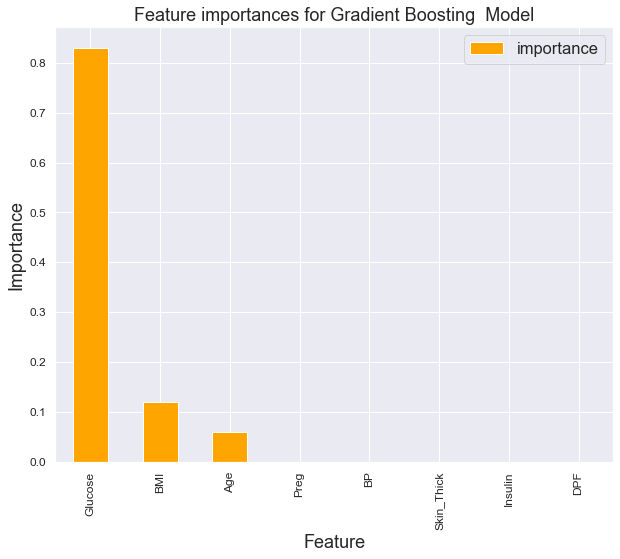

In [50]:
ax = df_feature_importance.plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(10,8),
        title= 'Feature importances for Gradient Boosting  Model',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Feature")

# Set the y-axis label
ax.set_ylabel("Importance");

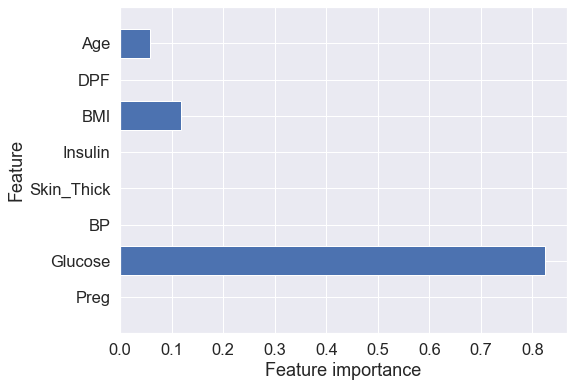

In [51]:
def plot_feature_importances_diabetes(gbc2):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), gbc2.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(gbc2)
plt.savefig('feature_importance')

In [52]:
# Gradient Boosting gives a lot of importance to the "Glucose" feature. 

# The second most important feature is the BMI, also not that surprising.

# Not so useful 
#  - Preg
#  - BP
#  - Skin_Thick
#  - Insulin


# we can remove those variables that have no importance and the performance will not suffer. 
# Let’s proceed with only the four most important variables, and see how the performance compares

In [53]:
# extract further remaining data into numpy array:
X_ext =df_HDR.drop(['Age','DPF','Preg','BP','Skin_Thick','Insulin','BMI','Outcome'],axis=1)
y_act=df_HDR['Outcome']

In [54]:
X_ext.shape

(724, 1)

In [55]:
X_ext.head()

,Glucose
0,148
1,85
2,183
3,89
4,137


In [56]:
df_HDR_final =df_HDR.drop(['Age','DPF','Preg','BP','Skin_Thick','BMI','Insulin'],axis=1)
df_HDR_final.head()

,Glucose,Outcome
0,148,1
1,85,0
2,183,1
3,89,0
4,137,1


In [57]:
print(df_HDR_final.shape)
print(X_ext.shape)
print(y_act.shape)

(724, 2)
(724, 1)
(724,)


In [67]:
# Train/Test Split with Scikit Learn:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, stratify = df_HDR_final.Outcome, random_state=0)

In [74]:
import statsmodels.formula.api as smf
model_f = 'Outcome ~ Glucose'

model = smf.ols(formula=model_f, data=df_HDR_final)
lmod = model.fit()

In [79]:
# fitted values (need a constant term for intercept)
model_fitted_y = lmod.fittedvalues

# model residuals
model_residuals = lmod.resid

# normalized residuals
model_norm_residuals = lmod.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = lmod.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = lmod.get_influence().cooks_distance[0]

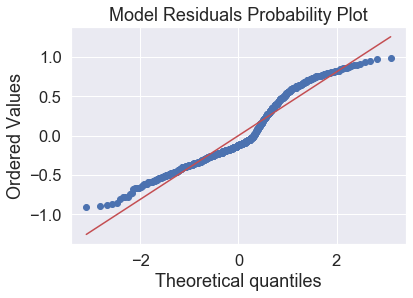

In [80]:
from scipy import stats
stats.probplot(lmod.resid, plot= plt)
plt.title("Model Residuals Probability Plot");

In [68]:
print("Accuracy on training set: {:.3f}".format(gbc2.score(X_train1, y_train1)))
print("Accuracy on test set: {:.3f}".format(gbc2.score(X_test1, y_test1)))

Accuracy on training set: 0.762
Accuracy on test set: 0.762


In [69]:
predictions_gb = gbc2.predict(X_test1)

In [70]:
predictions_gb

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0], dtype=int64)

### Evaluating Gradient Boosting Model:

In [71]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,predictions_gb))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       119
           1       0.81      0.40      0.54        62

    accuracy                           0.76       181
   macro avg       0.78      0.68      0.69       181
weighted avg       0.77      0.76      0.74       181



In [72]:
print(confusion_matrix(y_test1,predictions_gb))

[[113   6]
 [ 37  25]]


In [83]:
# For better visualisation:
con_matx = pd.crosstab(y_test1, predictions_gb, rownames=['Actual'], colnames=['Predicted'], margins=True)
con_matx

Predicted,0,1,All
Actual,,,
0,113,6,119
1,37,25,62
All,150,31,181


### Interpretations:
#### High precision value, recall >0.5, and high F1 score indicate the good performance of the model.
#### TN=113 means actually no Diabetes in 113 people, predicted also the same.
#### TP=25  means actual number of people with Diabetes is 25, prediction  also the same.
#### FP=6  means 6 people doesn't have Diabetes in reality , but the prediction shows them to have diabetes.
#### FN=37  means actual class shows that 37 people does have Diabetes, but the prediction shows them no diabetes.

### ROC Curve Metrics
A Receiver Operating Characteristic (ROC) curve calculates the false positive rates and true positive rates across different thresholds.

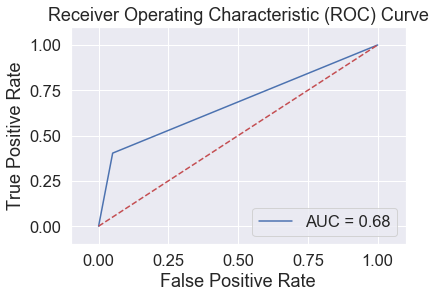

In [66]:
fpr, tpr, _ = metrics.roc_curve(y_test1, predictions_gb)
auc_score = metrics.auc(fpr, tpr)
#[fpr=false-positive-rate]
# [tpr=true-positive-rate]
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.show()
  

In [ ]:

The above curve indicates that the model dishtinguishes the positive and negative values by 68%.

---------------------------------------------------------------------------------------------------

### Dashboard with Charts in Tableau:

### https://public.tableau.com/profile/disoj#!/vizhome/DashboardforHealthcareProject1/Dashboard1?publish=yes

## .......The End..........